# CÓDIGOS TESIS
## Diseño de LNA
Pasos el diseño del amplificador de bajo ruido, requerimientos de diseño, parametros a tener en cuenta y demás
### Parametros S, Ganancia, Estabilidad, Ruido

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmath
import pylab as pl
from pylab import meshgrid, sin, cos, linspace, contourf, savefig, clf

import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  

%matplotlib inline
my_params = {
'figure.dpi': 120,
'figure.figsize': [4,4],
'figure.subplot.left' : 0.15,
'figure.subplot.right' : 0.9,
'figure.subplot.bottom' : 0.12,
'axes.titlesize' : 'large',
'axes.labelsize' : 12 ,
'ytick.labelsize' :'small',
'xtick.labelsize' :'small',
'legend.fontsize' :12, #small,
'legend.loc' : 'best',
'font.size' : 11.0,
'font.family' : 'serif',
'text.usetex' : False, # if you dont have latex
}
plt.rcParams.update(my_params)


my_params = {
'figure.dpi': 240,
'figure.figsize': [10,10],
'figure.subplot.left' : 0.15,
'figure.subplot.right' : 0.9,
'figure.subplot.bottom' : 0.12,
'axes.titlesize' : 'medium',
'axes.labelsize' : 10 ,
'ytick.labelsize' :'small',
'xtick.labelsize' :'small',
'legend.fontsize' : 8, #small,
'legend.loc' : 'best',
'font.size' : 11.0,
'font.family' : 'serif',
'text.usetex' : False, # if you dont have latex
}
rcParams.update(my_params)


matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


a1= fig.add_subplot(221)
a2= fig.add_subplot(222)
a3= fig.add_subplot(223)
a4= fig.add_subplot(224)






In [2]:
#Lectura de los datos
S=pd.read_csv("data/DATOS_PARAMETROS_S_LNA_SEPARADOS.csv")  
G=pd.read_csv("data/DATOS_GANANCIA_LNA_FINAL.csv")  
N=pd.read_csv("data/DATOS_NF2_LNA_FINAL.csv")
M=pd.read_csv("data/DATOS_MU_LNA_FINAL.csv")
#S_a=pd.read("data/DATOS_S11_SALLA_SINGLE.txt")

#print(S)

#Transformación de datos dB y Rad
for i in S.columns[1:5]:
    S[i] = [np.real(20*cmath.log10(j)) for j in S[i]]  
    
#S[S.columns[-4:] = [i*cmath.pi/180 for i in S[(S.columns[-4:])]]

for i in S.columns[-4:]:
    S[i] = [j*cmath.pi/180 for j in S[i]]
    
#print(S.iloc[:,0]) #Selecciona primera columna (Frecuencia)
#print(S.iloc[0] #Selecciona Primera fila (Nombres )
#print(S.loc[1:5]) #Selecciona Filas y Columnas forma una subtabla 

<Figure size 360x360 with 0 Axes>

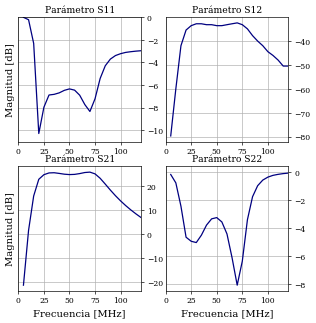

<Figure size 360x360 with 0 Axes>

In [6]:
# Parametros S

#S[S.columns[-4:] = [i*cmath.pi/180 for i in S[(S.columns[-4:])]]
#print(S.columns[1:5])

fig =plt.figure()
#ax=axes[0,0]
#x='F',y='Ms11', y='Ms22',

fig, axes = plt.subplots(2, 2)

s11 = S.plot(kind='line',x='F',y='Ms11', title='Parámetro S11',colormap='jet',legend=False, ax=axes[0,0], grid=True, xlim=[0,120], ylim=[-11,0]) 
s11.set_xlabel(" ")
s11.set_ylabel("Magnitud [dB]")

s12 = S.plot(kind='line', x='F',y='Ms12', title='Parámetro S12',colormap='jet',legend=False, ax=axes[0,1], grid=True, xlim=[0,120]) 
s12.set_xlabel(" ")
s12.set_ylabel(" ")

s21 = S.plot(kind='line', x='F',y='Ms21', title='Parámetro S21',colormap='jet',legend=False, ax=axes[1,0],  grid=True, xlim=[0,120]) 
s21.set_xlabel("Frecuencia [MHz]")
s21.set_ylabel("Magnitud [dB]")

s22 = S.plot(kind='line', x='F',y='Ms22', title='Parámetro S22',colormap='jet',legend=False, ax=axes[1,1],  grid=True, xlim=[0,120]) 
s22.set_xlabel("Frecuencia [MHz]")
s22.set_ylabel(" ")

plt.show()

plt.savefig('output.jpg')

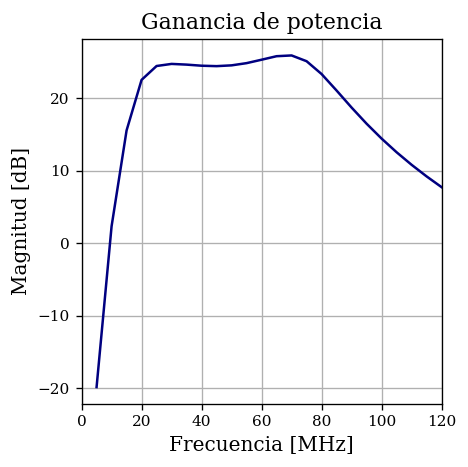

In [29]:
#Ganancia

#print(G)
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

g = G.plot(kind='line', x='Frecuencia',y='Ganancia', title='Ganancia de potencia',colormap='jet',legend=False, 
           grid=True, xlim=[0,120]) 
g.yaxis.tick_left()
g.set_xlabel("Frecuencia [MHz]")
g.set_ylabel("Magnitud [dB]")

savefig('ganancia_simulada.png')

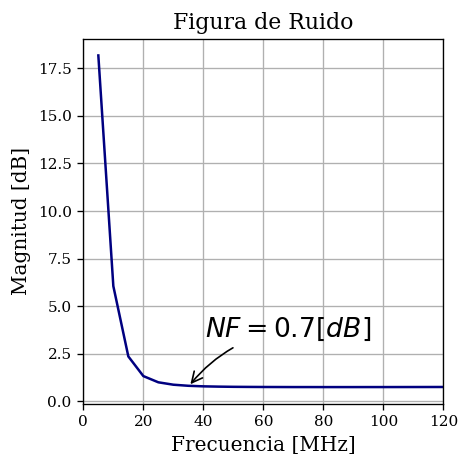

In [27]:
#Ruido

#print(N.iloc[8, 0])
#print(N.iloc[8, 1])

n = N.plot(kind='line', x='Frecuencia',y='Ruido', title='Figura de Ruido',colormap='jet',legend=False, 
           grid=True, xlim=[0,120]) 
n.yaxis.tick_left()
n.set_xlabel("Frecuencia [MHz]")
n.set_ylabel("Magnitud [dB]")
pl.annotate(r'$NF=0.7 [dB]$',
            xy=(N.iloc[6, 0], N.iloc[9,1]), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

savefig('noise_figure_simulate.png')

Text(0, 0.5, '$y$')

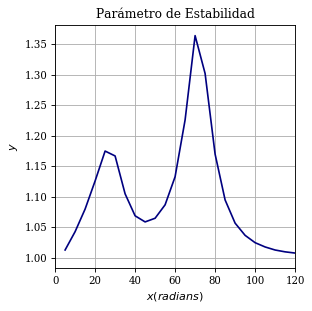

In [59]:
# Estabilidad

#print(M)

m = M.plot(kind='line', x='Frecuencia',y=' mu', title='Parámetro de Estabilidad',colormap='jet',
           legend=False, grid=True, xlim=[0,120]) 
m.yaxis.tick_left()
#m.set_xlabel("Frecuencia [MHz]")
#m.set_ylabel(r'$ \mu$')

pl.xlabel(r'$x (radians)$')
pl.ylabel(r'$y$')

Text(0, 0.5, ' Magnitud $ [dB]$')

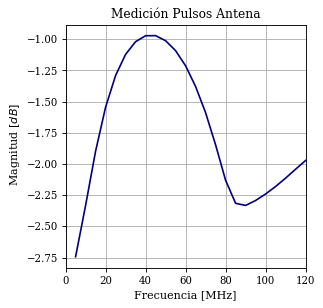

In [60]:
# PArametros S11 Antena sencilla

S_a = pd.read_csv('data/DATOS_S11_SALLA_SINGLE.csv', sep=";")
#print(S_a)

p = S_a.plot(kind='line', x='Frecuencia',y='S11', title='Medición Pulsos Antena',colormap='jet',          
             legend=False, grid=True, xlim=[0,120]) 
p.yaxis.tick_left()
p.set_xlabel("Frecuencia [MHz]")
p.set_ylabel( r' Magnitud $ [dB]$')

Text(0, 0.5, ' Magnitud $ [dB]$')

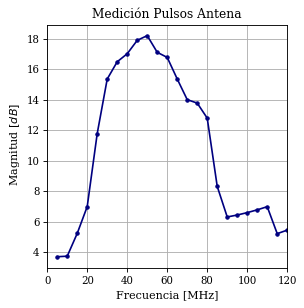

In [61]:

PP = pd.read_csv('data/DATOS_PULSOS_SWR.csv', sep=";")
#print(S_a)

p = PP.plot(kind='line', x='Frecuencia',y='swr', title=r'Medición Pulsos Antena',colormap='jet', marker='.',
             legend=False, grid=True, xlim=[0,120]) 
p.yaxis.tick_left()
p.set_xlabel("Frecuencia [MHz]")
p.set_ylabel( r' Magnitud $ [dB]$')